https://www.kaggle.com/datasets/uciml/mushroom-classification



Download the above dataset and solve the below questions:

1) Perform Logistic Regression with GridSearch CV and show underfitting and overfitting for different values of the parameter "C". Show using a graph where y-axis would be train-test accuracy and x-axis would be "C".


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the mushroom classification dataset
df = pd.read_csv(r'F:\VS Code\NLP Lab\mushrooms.csv')

In [2]:
# Preprocess the dataset
X = pd.get_dummies(df.iloc[:, 1:])
y = df.iloc[:, 0].apply(lambda x: 1 if x == 'p' else 0)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [3]:
# Define the parameter grid for logistic regression
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

# Create a logistic regression model
logreg = LogisticRegression(max_iter=10000)

# Perform grid search with cross-validation
grid_search = GridSearchCV(logreg, param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=10000),
             param_grid={'C': [0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

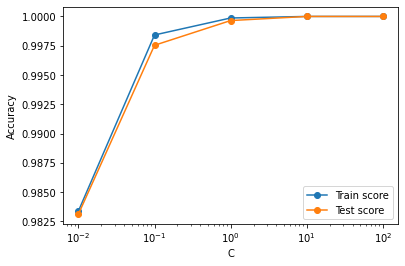

In [4]:
# Plot the train-test accuracy for different values of C
plt.plot(param_grid['C'], grid_search.cv_results_['mean_train_score'], 'o-', label='Train score')
plt.plot(param_grid['C'], grid_search.cv_results_['mean_test_score'], 'o-', label='Test score')
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

2) What are the important features here? Check using KNN. For example train your KNN model on one feature and calculate the accuracy, then add second feature and check the accuracy and so on.

In [41]:
from sklearn.neighbors import KNeighborsClassifier

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
# train KNN model on each feature separately and calculate accuracy
feature_accuracies = []
for i, col in enumerate(X.columns):
    knn = KNeighborsClassifier()
    knn.fit(X_train.iloc[:, i:i+1], y_train)
    acc = knn.score(X_test.iloc[:, i:i+1], y_test)
    feature_accuracies.append((col, acc))


In [43]:
# sort features by accuracy and print
feature_accuracies.sort(key=lambda x: x[1], reverse=True)
print('Feature accuracies:')
for feat, acc in feature_accuracies:
    print(f'{feat}: {acc:.4f}')

Feature accuracies:
odor_n: 0.8782
ring_type_p: 0.7742
stalk_surface_above_ring_k: 0.7618
gill_size_n: 0.7409
bruises_t: 0.7366
stalk_surface_above_ring_s: 0.7342
population_v: 0.7132
stalk_surface_below_ring_s: 0.6978
spore_print_color_n: 0.6695
spore_print_color_k: 0.6554
gill_spacing_w: 0.6203
stalk_color_above_ring_p: 0.6086
odor_s: 0.5834
gill_color_n: 0.5778
habitat_g: 0.5569
stalk_root_e: 0.5532
stalk_color_below_ring_g: 0.5514
cap_color_e: 0.5508
stalk_color_above_ring_g: 0.5508
cap_surface_y: 0.5495
habitat_l: 0.5489
population_s: 0.5391
odor_l: 0.5385
stalk_root_c: 0.5378
population_y: 0.5366
gill_color_u: 0.5305
ring_number_t: 0.5305
population_n: 0.5286
ring_number_o: 0.5274
gill_color_p: 0.5200
stalk_shape_t: 0.5188
stalk_color_above_ring_w: 0.5188
stalk_root_r: 0.5108
cap_shape_f: 0.5089
habitat_m: 0.5083
stalk_color_above_ring_o: 0.5058
stalk_color_below_ring_o: 0.5058
veil_color_w: 0.5052
population_c: 0.5052
gill_attachment_f: 0.5046
stalk_surface_below_ring_y: 0.5034
